This part defines the items i will be using

In [11]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn import svm
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize
%matplotlib inline

Here i set up the dataset from the kaggle from my computer
I also print out some items in the dataset

In [12]:
data = pd.read_csv("/Users/romar/Documents/Dataset2/train.csv")
label = pd.read_csv("/Users/romar/Documents/Dataset2/train.csv")
print (data.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

Here i print out the total images from the dataset including the lables

In [13]:
data_m = data.as_matrix()
print(data_m.shape)

(42000, 785)


Here i print out an image from the dataset

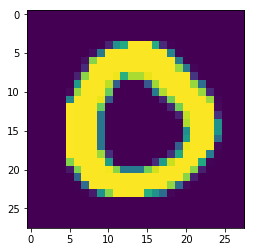

In [14]:
plt.imshow(data_m[4,1:].reshape((28,28)))

with data.iloc i am able to use the images and labels to split the the data so i make train and test sets so it can generalize good with new data 

In [15]:
label = data.iloc[0:5000,:1]
images = data.iloc[0:5000,1:]
x_image, test_images, y_labels, test_labels = train_test_split(images, label, train_size = 0.8, random_state = 0) 

C:\Users\romar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Here i use the LogisticRegression so i can train the model 

In [17]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_image, y_labels)

C:\Users\romar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

I predict with logistic regression the test images up to 280000

In [18]:
logisticRegr.predict(test_images[0:28000])

array([7, 7, 6, 9, 2, 0, 8, 1, 4, 2, 8, 8, 5, 3, 2, 5, 9, 0, 5, 8, 6, 0, 4,
       6, 5, 8, 3, 1, 2, 3, 2, 5, 0, 0, 5, 4, 0, 7, 1, 2, 9, 4, 3, 2, 8, 4,
       0, 0, 8, 8, 5, 0, 1, 6, 5, 8, 5, 9, 4, 3, 9, 0, 4, 0, 1, 7, 5, 0, 1,
       3, 5, 2, 0, 1, 2, 0, 1, 7, 0, 9, 2, 9, 7, 7, 5, 0, 7, 9, 1, 5, 4, 8,
       9, 0, 4, 7, 2, 8, 9, 7, 5, 2, 2, 6, 0, 4, 8, 9, 3, 1, 3, 4, 0, 6, 8,
       8, 6, 4, 0, 2, 9, 8, 2, 6, 7, 9, 8, 5, 9, 1, 7, 8, 2, 7, 4, 5, 6, 9,
       2, 7, 9, 3, 1, 4, 4, 6, 1, 8, 3, 7, 5, 1, 6, 3, 2, 1, 4, 9, 4, 2, 3,
       5, 4, 7, 7, 9, 2, 8, 9, 9, 1, 8, 4, 9, 9, 0, 5, 6, 5, 4, 3, 4, 0, 3,
       6, 2, 4, 1, 5, 0, 6, 6, 4, 0, 1, 9, 5, 4, 7, 2, 7, 2, 3, 6, 0, 4, 2,
       3, 0, 9, 9, 1, 9, 2, 1, 4, 3, 8, 3, 8, 2, 6, 7, 2, 0, 7, 0, 0, 7, 0,
       1, 4, 5, 8, 4, 1, 2, 6, 3, 2, 1, 8, 1, 1, 2, 5, 5, 0, 4, 9, 1, 1, 2,
       7, 9, 3, 1, 9, 6, 3, 8, 6, 7, 3, 5, 6, 0, 0, 1, 3, 4, 7, 1, 7, 2, 6,
       8, 9, 7, 8, 1, 1, 8, 9, 5, 6, 9, 4, 2, 8, 7, 7, 4, 7, 3, 4, 1, 3, 6,
       8, 3,

Here i test my model and see how well it did.

In [19]:
score = logisticRegr.score(test_images, test_labels)
print(score)

0.797


Here i just ready my data and test it with the test datasets from kaggle 

In [20]:
test_data=pd.read_csv("/Users/romar/Documents/Dataset2/test.csv")
results=logisticRegr.predict(test_data[0:28000])
print(results)

[2 0 8 ..., 3 9 2]


In [21]:
df = pd.DataFrame(results)
df.index+=1
df.index.name='ImageId'
df.columns=['Label']
df.to_csv('results3.csv', header=True)